# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from math import ceil
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df =  study_results.merge(mouse_metadata, on='Mouse ID')

# Display the data table for preview

display(combined_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.

mice = combined_df["Mouse ID"].unique()
print(len(mice))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mouse = []
#for mouse in mice 
 #if combined_df["Timepoint" , "Mouse ID"]
duplicate_mouse = combined_df[combined_df.duplicated()]
duplicate_mouse                          

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = duplicate_mouse["Mouse ID"]
#duplicate_data = []
#for mouse in combined_df
duplicate_df = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicate_df
#df.loc[df['column_name'] == some_value]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#for row in combined_df:
    #if #mouse id = duplicate_mouse then drop row
clean_df = combined_df.drop(index=[860,861,862,863,864,865,866,867,868,869,870,871,872])
display(clean_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].unique()
print(len(clean_mice))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stats_df = clean_df.groupby('Drug Regimen')
mean_tumor = stats_df['Tumor Volume (mm3)'].mean()
meadian_tumor = stats_df['Tumor Volume (mm3)'].median()
var_tumor = stats_df['Tumor Volume (mm3)'].var()
dev_tumor = stats_df['Tumor Volume (mm3)'].std()
sem_tumor = stats_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume' : mean_tumor, "Median Tumor Volume": meadian_tumor, "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev": dev_tumor, "Tumor Volume Std. Err.": sem_tumor })
summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse ID/Timepoints for each drug regimen')

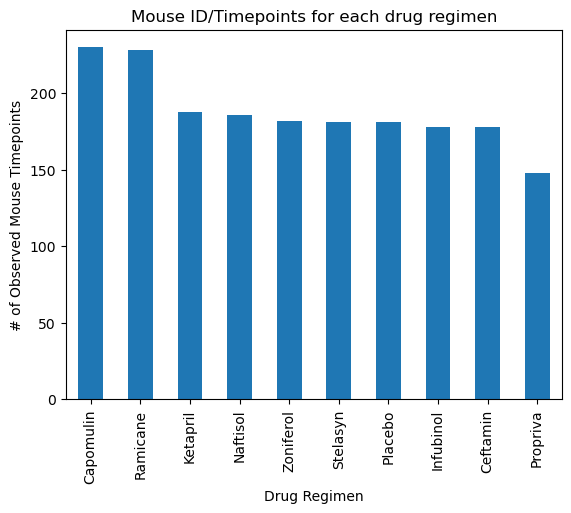

In [9]:
# Generate a bar plot showing the total number of rows Mou(se ID/Timepoints) for each drug regimen using Pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width= .5, zorder=2)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")
bar_plot.set_title("Mouse ID/Timepoints for each drug regimen")

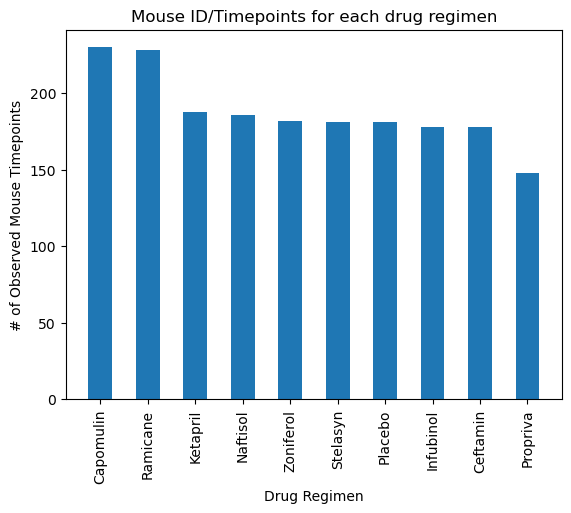

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# set x axis
observations = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(observations))
# plot
plt.bar(x_axis, observations, width = 0.5, zorder=2)
# format
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, observations.index.values)
plt.xticks(rotation=90)
plt.title("Mouse ID/Timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()


Text(0, 0.5, 'Sex')

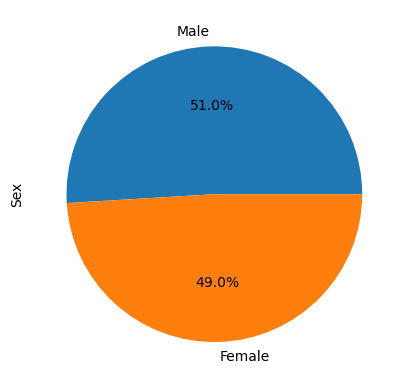

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# count sex distribution
sex_data = clean_df['Sex'].value_counts()
# plot graph
pie_plot = sex_data.plot.pie(autopct="%1.1f%%" )
pie_plot.set_ylabel('Sex')

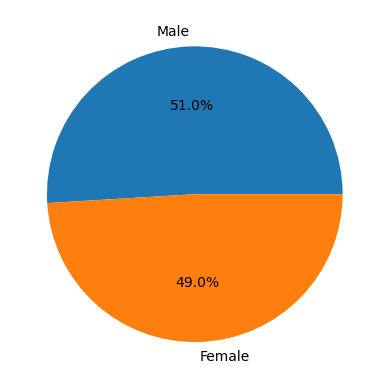

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", )
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df= pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
mouse_df =mouse_df.rename(columns = {'Timepoint':'Timepoint Max'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = pd.merge(clean_df, mouse_df, on = "Mouse ID")
display(merged_mouse)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint Max
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loop_df = merged_mouse.loc[merged_mouse["Drug Regimen"]== treat]
    final_tumor_df = loop_df.loc[loop_df['Timepoint'] == loop_df ['Timepoint Max']]
    final_tumor = final_tumor_df['Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(final_tumor)
    #print(vol_data)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        #count outliers
    upper_outliers = final_tumor.loc[(final_tumor_df['Tumor Volume (mm3)'] >= upper_bound)].count()
    lower_outliers = final_tumor.loc[(final_tumor_df['Tumor Volume (mm3)'] <= lower_bound)].count()
    total_outliers = lower_outliers + upper_outliers
    print(f"For {treat} tumors below {lower_bound}mm could be outliers.")
    print(f"For {treat} tumors above {upper_bound}mm could be outliers.")
    print(f" {treat} potential outliers: {total_outliers}")
    

For Capomulin tumors below 20.70456164999999mm could be outliers.
For Capomulin tumors above 51.83201549mm could be outliers.
 Capomulin potential outliers: 0
For Ramicane tumors below 17.912664470000003mm could be outliers.
For Ramicane tumors above 54.30681135mm could be outliers.
 Ramicane potential outliers: 0
For Infubinol tumors below 36.83290494999999mm could be outliers.
For Infubinol tumors above 82.74144559000001mm could be outliers.
 Infubinol potential outliers: 1
For Ceftamin tumors below 25.355449580000002mm could be outliers.
For Ceftamin tumors above 87.66645829999999mm could be outliers.
 Ceftamin potential outliers: 0


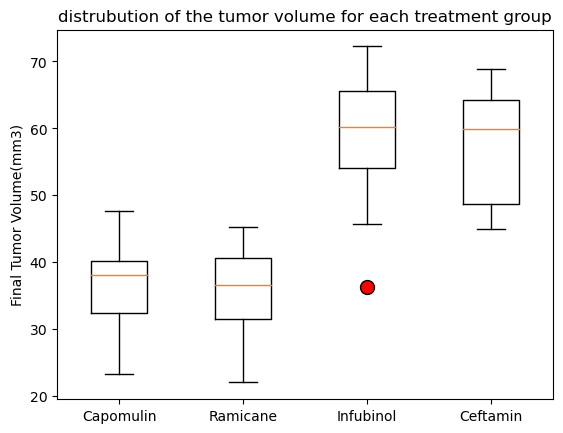

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
formating =  dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(vol_data, flierprops= formating)
#labels
plt.title('distrubution of the tumor volume for each treatment group')
plt.ylabel('Final Tumor Volume(mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

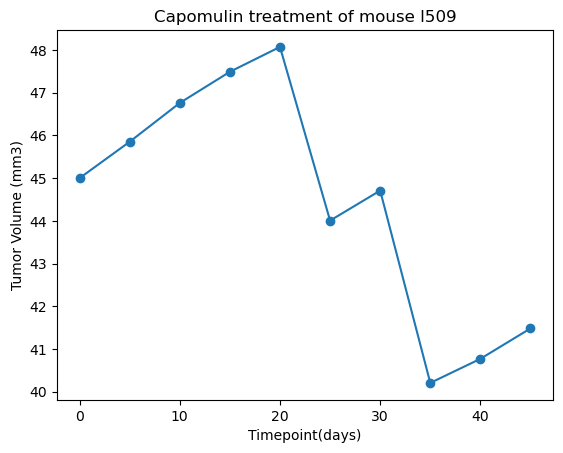

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singel_mouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(singel_mouse['Timepoint'], singel_mouse['Tumor Volume (mm3)'], marker = "o")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

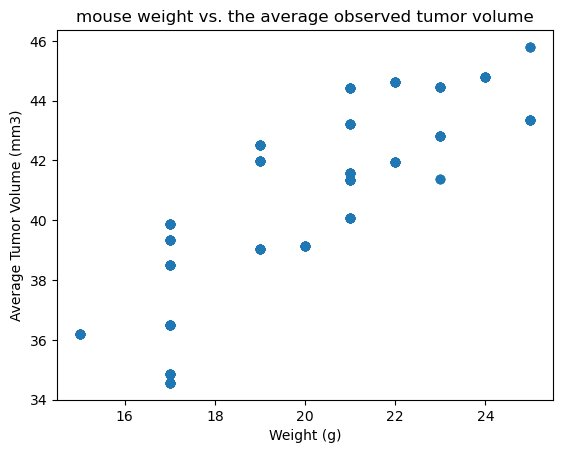

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
#find average tumor
average_tumor = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
average_tumor.rename(columns = {'Tumor Volume (mm3)':'Average Tumor'})
Capomulin_df = pd.merge(Capomulin_df, average_tumor, on = "Mouse ID" ).drop_duplicates()
                     #plot scatter
plt.scatter(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)_y'])  

#labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("mouse weight vs. the average observed tumor volume")
plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.834


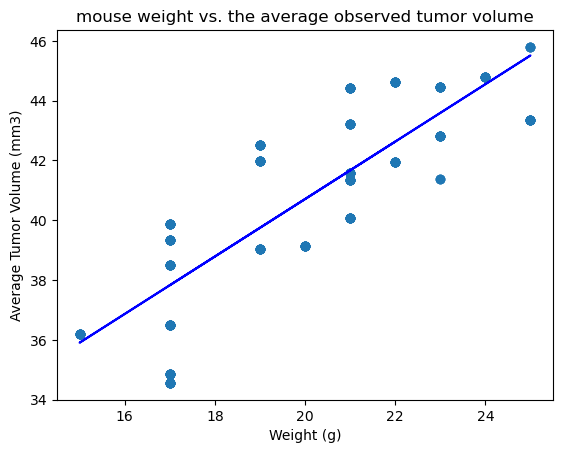

In [18]:


# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
    #find correlation
correlation = Capomulin_df['Weight (g)'].corr (Capomulin_df['Tumor Volume (mm3)_y'])
correlation = round(correlation,3)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
    # make regression line
x = Capomulin_df['Weight (g)'].values.reshape(-1, 1)
y = Capomulin_df['Tumor Volume (mm3)_y'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
    # plot chart
plt.plot(x, regressor.predict(x), color = 'blue')     
plt.scatter(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)_y'])
    #set labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("mouse weight vs. the average observed tumor volume")
plt.show()